# Ensemble Technique: Bagging and Boosting Project 4 - Travel Package Purhase
## Paige Singleton
## August 2022

## Problem Statement
### A company "Visit with us" wants to "enable and establish a viable business model to expand the customer base.

- Given customer data, "analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted."

## Data Dictionary

### Customer details:
- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 
- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer


## Section 1: Perform an Exploratory Data Analysis on the data
- Univariate Analysis
- Bivariate Analysis
- Customer Profile (with at least 3 points to distinguish features for each package)
    - Basic
    - Standard
    - Deluxe
    - Super Deluxe
    - King
- Exploratory Deep Dive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Read CSV
data = pd.read_csv("Tourism.csv")
data.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [3]:
# Display 10 random rows
np.random.seed(1)
data.sample(n=10)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
3015      203015          0  27.0  Company Invited         1              7.0   
1242      201242          0  40.0     Self Enquiry         3             13.0   
3073      203073          0  29.0     Self Enquiry         2             15.0   
804       200804          0  48.0  Company Invited         1              6.0   
3339      203339          0  32.0     Self Enquiry         1             18.0   
3080      203080          1  36.0  Company Invited         1             32.0   
2851      202851          0  46.0     Self Enquiry         1             17.0   
2883      202883          1  32.0  Company Invited         1             27.0   
1676      201676          0  22.0     Self Enquiry         1             11.0   
1140      201140          0  44.0     Self Enquiry         1             13.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
3015        Salaried  Female                       4                6.0   
1242  Small Business    Male                       2                3.0   
3073  Small Business    Male                       4                5.0   
804   Small Business    Male                       2                1.0   
3339  Small Business    Male                       4                4.0   
3080        Salaried  Female                       4                4.0   
2851        Salaried    Male                       4                4.0   
2883        Salaried    Male                       4                4.0   
1676        Salaried    Male                       2                1.0   
1140  Small Business  Female                       2                3.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
3015          Basic                    3.0       Married            5.0   
1242           King                    4.0        Single            2.0   
3073          Basic                    3.0       Married            3.0   
804    Super Deluxe                    3.0        Single            3.0   
3339         Deluxe                    5.0      Divorced            3.0   
3080          Basic                    4.0       Married            3.0   
2851          Basic                    3.0      Divorced            5.0   
2883       Standard                    3.0      Divorced            5.0   
1676          Basic                    4.0       Married            2.0   
1140           King                    3.0       Married            1.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
3015         0                       4       1                       3.0   
1242         0                       4       1                       NaN   
3073         0                       2       0                       2.0   
804          0                       2       0                       0.0   
3339         1                       2       0                       3.0   
3080         1                       3       0                       1.0   
2851         0                       5       1                       1.0   
2883         0                       3       1                       1.0   
1676         1                       4       1                       0.0   
1140         1                       4       1                       1.0   

         Designation  MonthlyIncome  
3015       Executive        23042.0  
1242              VP        34833.0  
3073       Executive        23614.0  
804              AVP        31885.0  
3339         Manager        25511.0  
3080       Executive        20700.0  
2851       Executive        21332.0  
2883  Senior Manager        28502.0  
1676       Executive        17328.0  
1140              VP        34049.0

In [4]:
#Understand tha overall dataset structure and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
#Designate initial categorical columns and numerical columns,
cat_cols = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
num_cols = ['CustomerID','ProdTaken','Age','CityTier','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','MonthlyIncome']

In [6]:
# of rows and columns
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.') 

There are 4888 rows and 20 columns.


In [7]:
# Check for null values in dataset
data.isnull().sum()


CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
#Calculate descrition statistics for numerical columns
data.describe().T

count           mean          std       min  \
CustomerID                4888.0  202443.500000  1411.188388  200000.0   
ProdTaken                 4888.0       0.188216     0.390925       0.0   
Age                       4662.0      37.622265     9.316387      18.0   
CityTier                  4888.0       1.654255     0.916583       1.0   
DurationOfPitch           4637.0      15.490835     8.519643       5.0   
NumberOfPersonVisiting    4888.0       2.905074     0.724891       1.0   
NumberOfFollowups         4843.0       3.708445     1.002509       1.0   
PreferredPropertyStar     4862.0       3.581037     0.798009       3.0   
NumberOfTrips             4748.0       3.236521     1.849019       1.0   
Passport                  4888.0       0.290917     0.454232       0.0   
PitchSatisfactionScore    4888.0       3.078151     1.365792       1.0   
OwnCar                    4888.0       0.620295     0.485363       0.0   
NumberOfChildrenVisiting  4822.0       1.187267     0.857861       0.0   
MonthlyIncome             4655.0   23619.853491  5380.698361    1000.0   

                                25%       50%        75%       max  
CustomerID                201221.75  202443.5  203665.25  204887.0  
ProdTaken                      0.00       0.0       0.00       1.0  
Age                           31.00      36.0      44.00      61.0  
CityTier                       1.00       1.0       3.00       3.0  
DurationOfPitch                9.00      13.0      20.00     127.0  
NumberOfPersonVisiting         2.00       3.0       3.00       5.0  
NumberOfFollowups              3.00       4.0       4.00       6.0  
PreferredPropertyStar          3.00       3.0       4.00       5.0  
NumberOfTrips                  2.00       3.0       4.00      22.0  
Passport                       0.00       0.0       1.00       1.0  
PitchSatisfactionScore         2.00       3.0       4.00       5.0  
OwnCar                         0.00       1.0       1.00       1.0  
NumberOfChildrenVisiting       1.00       1.0       2.00       3.0  
MonthlyIncome              20346.00   22347.0   25571.00   98678.0

In [9]:
# Understand the number of unique values in each column
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [10]:
#Check for duplicates
data[data.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [11]:
#Understand the number of each value for the following columns: 
for col in cat_cols:
    print(data[col].value_counts())
    print("_________________________________")

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
_________________________________
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
_________________________________
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
_________________________________
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
_________________________________
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
_________________________________
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
_________________________________


### Initial Observations 

### Customer details:
- CustomerID: Unique customer I
    - this variable will not inform the model and should be dropped from clean dataset
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
    - This variable is currently an integer dtype;
    - 2 unique values
    - no nulls
- Age: Age of customer
    - Min:18; Max:61; Mean:37;Median:36; data is likely not skewed right or left
    - 226 null values therefore explore imputation
    - 44 unique values
    - dtppe is float
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
    - Object dtype; change to category
    - 2 unique counts 
    - 25 nulls therefore explore null imputation
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
    - 3 unique values;
    - dtype is integer;
- Occupation: Occupation of customer
    - 4 unique values; object dtype
    - change dtype to category and get dummy variables 
    - no nulls
- Gender: Gender of customer
    - Gender has 3 unique values (Male, Female and Fe Male);
    - All 'Fe Male' values (155 values) needs to be changed to 'Female'
    - Object dtype needs to change to category and get dummy variables
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
    - no nulls
    - unique count = 5
    - dtype is integer;
- PreferredPropertyStar: Preferred hotel property rating by customer
    - 26 nulls
    - 3 unique values
    - float64 dtype (could change to integer)
    - min:3.0; max:5.0; median: 3.0; mean: 3.78; data is skewed right 
- MaritalStatus: Marital status of customer
    - no nulls
    - object dtype with 4 unique values(married, divorced, single, unmarried)
    - Single and Unmarried represent same idea therefore combine these into one unique value 'single'
- NumberOfTrips: Average number of trips in a year by customer
    - missing 140 values
    - number of unique values: 12
    - min:1.0; max:22; median:3.0; mean:3.23
    - probable outliers
- Passport: The customer has a passport or not (0: No, 1: Yes)
    - int64 dtype
    - number of unique values:2
    - no nulls 
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
    - int64 dtype
    - no nulls
    - 2 unique values
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
    - float64 dtype
    - 66 nulls
    - 4 unique values
- Designation: Designation of the customer in the current organization
    - object dtype (change to category)
    - no nulls
    - 5 unique values
- MonthlyIncome: Gross monthly income of the customer
    - dtype float64
    - min:1000; max:98678; median:22347; mean:23620
    - 233 nulls

### Customer interaction data: 
- PitchSatisfactionScore: Sales pitch satisfaction score
    - no nulls
    - dtype int64
    - min:1.0; max:5.0; median:3.0; mean:3.08
    - 5 unique values
- ProductPitched: Product pitched by the salesperson
    - object dtype (change to category) and get dummy variables
    - 5 unique variables
    - no nulls
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
    - float64 dtype
    - 45 nulls
    - min:1.0; max:6.0; median:4.0; mean:3.71; 
    - 6 unique values
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
    - float64 dtype
    - 45 nulls
    - min:5.0; max:127.0; median:13.0; mean; 15.49
    - 34 unique values
    - possible outliers

### Univariate Analysis


In [12]:
# From Anime Rating Prediction case study, function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Variable - 'ProdTaken' Analysis 

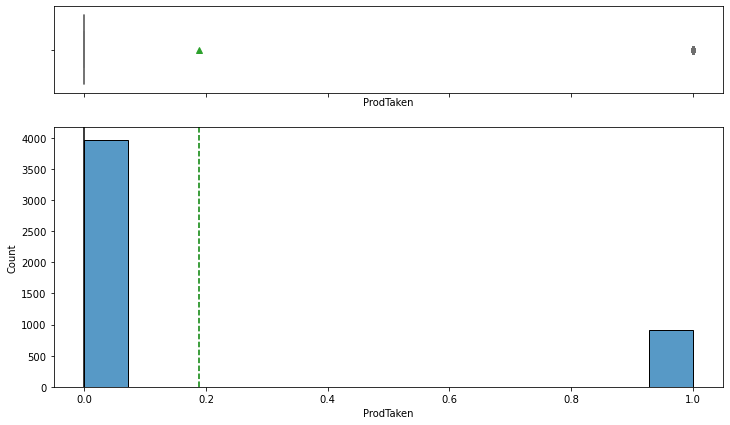

In [13]:

histogram_boxplot(data, "ProdTaken")


In [14]:
data['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [15]:
# Compute the number of products purchased by product pitched
data.groupby(['ProductPitched'])['ProdTaken'].value_counts()

ProductPitched  ProdTaken
Basic           0            1290
                1             552
Deluxe          0            1528
                1             204
King            0             210
                1              20
Standard        0             618
                1             124
Super Deluxe    0             322
                1              20
Name: ProdTaken, dtype: int64

In [16]:
# Compute the percentage of products purchased by Product 
data.groupby(['ProductPitched'])['ProdTaken'].value_counts(normalize=True)*100

ProductPitched  ProdTaken
Basic           0            70.032573
                1            29.967427
Deluxe          0            88.221709
                1            11.778291
King            0            91.304348
                1             8.695652
Standard        0            83.288410
                1            16.711590
Super Deluxe    0            94.152047
                1             5.847953
Name: ProdTaken, dtype: float64

In [17]:
data[['ProductPitched']].apply(lambda x: x.astype('category'))


ProductPitched
0            Deluxe
1            Deluxe
2             Basic
3             Basic
4             Basic
...             ...
4883         Deluxe
4884          Basic
4885       Standard
4886          Basic
4887          Basic

[4888 rows x 1 columns]

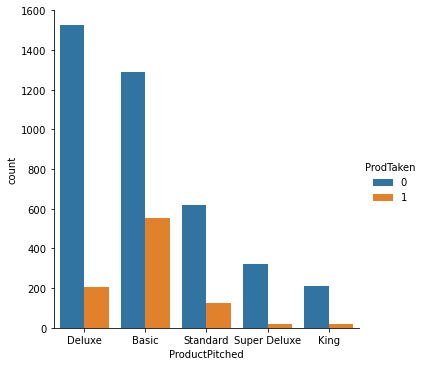

In [18]:
sns.catplot(data=data, kind='count',x='ProductPitched', hue='ProdTaken')

In [19]:
data['ProductPitched'].value_counts()

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

#### Insights - ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
    - approximately a 4 to 1 ratio of 0(No - 3968) to 1(Yes - 920)
    - This variable will be the target variable for the model
    - no nulls therefore this variable is ready for model build
    - When Pitched, Basic Products are purchased 30% of the time, Deluxe Products are purchased 11% of the time, King Products are purchased 9% of the time, Standard Products are purchased 17% of the time and Super Deluxed are purchased 6% of the time

#### Variable - 'Age' Analysis 

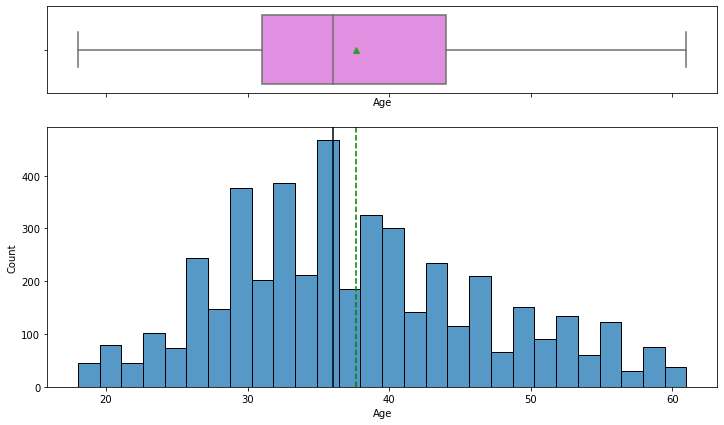

In [20]:
histogram_boxplot(data, "Age")

In [21]:
ProdByAge = data.groupby(['ProductPitched'])['Age'].median()
ProdByAge

ProductPitched
Basic           32.0
Deluxe          36.0
King            49.0
Standard        38.0
Super Deluxe    49.0
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='ProductPitched'>

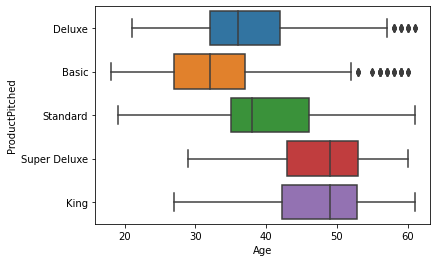

In [22]:
sns.boxplot(data = data, x='Age',y='ProductPitched')

In [23]:
data.groupby(['ProductPitched'])['Age'].count()

ProductPitched
Basic           1698
Deluxe          1651
King             230
Standard         741
Super Deluxe     342
Name: Age, dtype: int64

In [24]:
#Impute 'Age' null values with median of Product Pitched group membership - (https://medium.com/analytics-vidhya/best-way-to-impute-categorical-data-using-groupby-mean-mode-2dc5f5d4e12d)
data['Age'] = data.groupby(['ProductPitched'], sort=False)['Age'].apply(lambda x: x.fillna(x.median()))

data['Age'].isnull().sum()

0

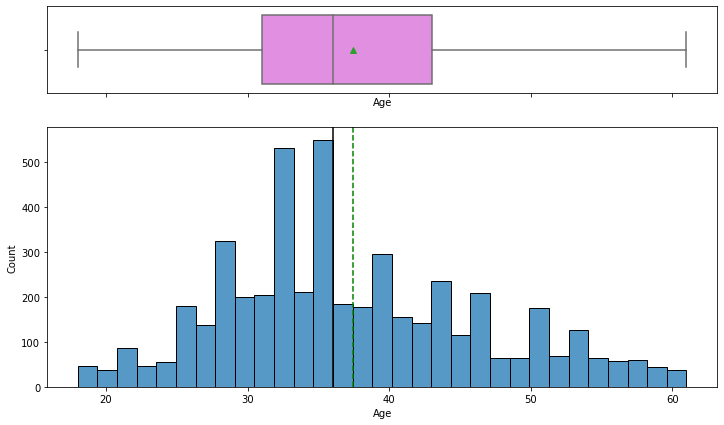

In [25]:
#Review boxplot and histogram to check new distribution
histogram_boxplot(data, "Age")

<AxesSubplot:xlabel='Age', ylabel='ProductPitched'>

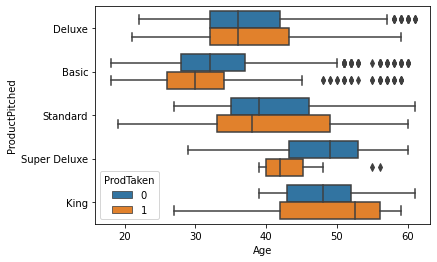

In [26]:
sns.boxplot(data = data, x='Age',y='ProductPitched', hue='ProdTaken')

In [27]:
# Compute the number of products purchased by product pitched and median age
data.groupby(['ProductPitched','ProdTaken'])['Age'].median()

ProductPitched  ProdTaken
Basic           0            32.0
                1            30.0
Deluxe          0            36.0
                1            36.0
King            0            48.0
                1            52.5
Standard        0            39.0
                1            38.0
Super Deluxe    0            49.0
                1            42.0
Name: Age, dtype: float64

#### Insights - 'Age'
    - Min:18; Max:61; Mean:37;Median:36; data is likely not skewed right or left
    - Data Distribution is ready for model build (appears somewhat normal)
    - 226 null values imputed with Median of product Pitched group membership
    - As age increases, customers appear to be pitched products in this order: Basic, Deluxe, standard, King
    - Super Deluxe, when pitched, is taken only 5% of the time with a median age of 53. Only older individuals appear to be interested in Super Deluxe

#### Variable 'Type of Contact' Analysis

In [28]:
# Compute the percent of Type of contact values in each Type of contact group
data.groupby(['TypeofContact'])['CustomerID'].count()/len(data)*100


TypeofContact
Company Invited    29.030278
Self Enquiry       70.458265
Name: CustomerID, dtype: float64

In [29]:
# Compute the number of data points in each Type of contact group
data.groupby(['TypeofContact'])['CustomerID'].count()

TypeofContact
Company Invited    1419
Self Enquiry       3444
Name: CustomerID, dtype: int64

In [30]:
#Group Type of contact data by Product pitched
data.groupby(['TypeofContact'])['ProductPitched'].value_counts()

TypeofContact    ProductPitched
Company Invited  Deluxe             541
                 Basic              516
                 Standard           218
                 Super Deluxe        96
                 King                48
Self Enquiry     Basic             1316
                 Deluxe            1176
                 Standard           524
                 Super Deluxe       246
                 King               182
Name: ProductPitched, dtype: int64

In [31]:

data['TypeofContact'].isnull().sum()

25

In [32]:
# Impute null values with Product pitched group modes
data['TypeofContact']=data.groupby(['ProductPitched'], sort=False)['TypeofContact'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [33]:
data['TypeofContact'].isnull().sum()

0

In [34]:
data.groupby(['TypeofContact'])['ProductPitched'].value_counts()

TypeofContact    ProductPitched
Company Invited  Deluxe             541
                 Basic              516
                 Standard           218
                 Super Deluxe        96
                 King                48
Self Enquiry     Basic             1326
                 Deluxe            1191
                 Standard           524
                 Super Deluxe       246
                 King               182
Name: ProductPitched, dtype: int64

In [35]:
data.groupby(['TypeofContact'])['ProductPitched'].value_counts(normalize = True)*100

TypeofContact    ProductPitched
Company Invited  Deluxe            38.125440
                 Basic             36.363636
                 Standard          15.362932
                 Super Deluxe       6.765328
                 King               3.382664
Self Enquiry     Basic             38.224272
                 Deluxe            34.332661
                 Standard          15.105218
                 Super Deluxe       7.091381
                 King               5.246469
Name: ProductPitched, dtype: float64

In [36]:
# Compute the number of products purchased by product pitched
data.groupby(['ProductPitched','ProdTaken'])['TypeofContact'].value_counts()

ProductPitched  ProdTaken  TypeofContact  
Basic           0          Self Enquiry        968
                           Company Invited     322
                1          Self Enquiry        358
                           Company Invited     194
Deluxe          0          Self Enquiry       1055
                           Company Invited     473
                1          Self Enquiry        136
                           Company Invited      68
King            0          Self Enquiry        162
                           Company Invited      48
                1          Self Enquiry         20
Standard        0          Self Enquiry        432
                           Company Invited     186
                1          Self Enquiry         92
                           Company Invited      32
Super Deluxe    0          Self Enquiry        242
                           Company Invited      80
                1          Company Invited      16
                           Self Enquiry

In [37]:
# Compute the number of products purchased by product pitched
data.groupby(['ProductPitched','ProdTaken'])['TypeofContact'].value_counts(normalize=True)*100

ProductPitched  ProdTaken  TypeofContact  
Basic           0          Self Enquiry        75.038760
                           Company Invited     24.961240
                1          Self Enquiry        64.855072
                           Company Invited     35.144928
Deluxe          0          Self Enquiry        69.044503
                           Company Invited     30.955497
                1          Self Enquiry        66.666667
                           Company Invited     33.333333
King            0          Self Enquiry        77.142857
                           Company Invited     22.857143
                1          Self Enquiry       100.000000
Standard        0          Self Enquiry        69.902913
                           Company Invited     30.097087
                1          Self Enquiry        74.193548
                           Company Invited     25.806452
Super Deluxe    0          Self Enquiry        75.155280
                           Company Invited   

#### Insights - 'TypeofContact'
- 25 null values imputed with mode given Product Pitched
- Customers who self-inquiry (71%) outnumber customers (29%) who are invited by the company
- Both types of customers are initially pitched Basic and Deluxe products (although self-inquiry are pitched slightly more Basic than Deluxe and vice versa for company invited)
- Product pitch percentages are not greatly impacted by type of contact; percentages are similar with exception of Basic and Deluxe varying slightly; Self-enquiry favors Basic whereas Company invited favors Deluxe
- Out of those who take the Basic product, 65% are self-enquiry and 35% are company invited
- Out of those who take the Deluxe product,67% are self-enquiry and 33% are company invited
- Out of those who take the King product, 100 are self-inquiry
- Out of those who take the standard product, 74% are self enquiry and 26% are Company invited
- Out of those who take the Super Deluxe product, 80% are company invited and 20% are self-enquiry
- King, standard and Super Deluxe sales numbers for sales enquiry outpace the number of self enquiry. (These are likely up sales)

#### Variable 'CityTier' Analysis

In [38]:
# Compute the number of data points in each CityTier group
data.groupby(['CityTier'])['CustomerID'].count()

CityTier
1    3190
2     198
3    1500
Name: CustomerID, dtype: int64

In [39]:
# Compute the percent of Type of contact values in each CityTier group
data.groupby(['CityTier'])['CustomerID'].count()/len(data)*100

CityTier
1    65.261866
2     4.050736
3    30.687398
Name: CustomerID, dtype: float64

In [40]:
#Group CityTier data by Product pitched
data.groupby(['CityTier'])['ProductPitched'].value_counts()

CityTier  ProductPitched
1         Basic             1466
          Deluxe             908
          Standard           436
          Super Deluxe       212
          King               168
2         Basic              108
          Deluxe              40
          King                22
          Standard            18
          Super Deluxe        10
3         Deluxe             784
          Standard           288
          Basic              268
          Super Deluxe       120
          King                40
Name: ProductPitched, dtype: int64

In [41]:
data.groupby(['CityTier'])['ProductPitched'].value_counts(normalize=True)*100

CityTier  ProductPitched
1         Basic             45.956113
          Deluxe            28.463950
          Standard          13.667712
          Super Deluxe       6.645768
          King               5.266458
2         Basic             54.545455
          Deluxe            20.202020
          King              11.111111
          Standard           9.090909
          Super Deluxe       5.050505
3         Deluxe            52.266667
          Standard          19.200000
          Basic             17.866667
          Super Deluxe       8.000000
          King               2.666667
Name: ProductPitched, dtype: float64

In [42]:
# Compute the number of products purchased by product pitched
data.groupby(['ProductPitched','ProdTaken'])['CityTier'].value_counts()

ProductPitched  ProdTaken  CityTier
Basic           0          1           1074
                           3            146
                           2             70
                1          1            392
                           3            122
                           2             38
Deluxe          0          1            848
                           3            640
                           2             40
                1          3            144
                           1             60
King            0          1            156
                           3             32
                           2             22
                1          1             12
                           3              8
Standard        0          1            384
                           3            224
                           2             10
                1          3             64
                           1             52
                           2            

In [43]:
# Compute the percentages of products purchased by product pitched
data.groupby(['ProductPitched','ProdTaken'])['CityTier'].value_counts(normalize=True)*100

ProductPitched  ProdTaken  CityTier
Basic           0          1           83.255814
                           3           11.317829
                           2            5.426357
                1          1           71.014493
                           3           22.101449
                           2            6.884058
Deluxe          0          1           55.497382
                           3           41.884817
                           2            2.617801
                1          3           70.588235
                           1           29.411765
King            0          1           74.285714
                           3           15.238095
                           2           10.476190
                1          1           60.000000
                           3           40.000000
Standard        0          1           62.135922
                           3           36.245955
                           2            1.618123
                1          3     

#### Insights - City Tier
- CityTier 1 - Product pitched - 46% Basic and 28% Deluxe
- City Tier 2 is similar to City Tier 1 with 55% Basic and 20% Deluxe
- City Tier 3 is different from City Tier 1 and City Tier 2 with 52% Deluxe and 19% Standard; Basic accounts for 18% of products pitched

#### Variable 'Occupation' Analysis


In [44]:
# Compute the number of data points in each Occupation group
data.groupby(['Occupation'])['CustomerID'].count()

Occupation
Free Lancer          2
Large Business     434
Salaried          2368
Small Business    2084
Name: CustomerID, dtype: int64

In [45]:
# Compute the percent of Occupation values in each group
data.groupby(['Occupation'])['CustomerID'].count()/len(data)*100

Occupation
Free Lancer        0.040917
Large Business     8.878887
Salaried          48.445172
Small Business    42.635025
Name: CustomerID, dtype: float64

In [46]:
#Group Occupation data by Product pitched
data.groupby(['Occupation'])['ProductPitched'].value_counts()

Occupation      ProductPitched
Free Lancer     Basic               2
Large Business  Basic             196
                Deluxe            124
                Standard           84
                Super Deluxe       18
                King               12
Salaried        Basic             924
                Deluxe            818
                Standard          338
                Super Deluxe      174
                King              114
Small Business  Deluxe            790
                Basic             720
                Standard          320
                Super Deluxe      150
                King              104
Name: ProductPitched, dtype: int64

In [47]:
data.groupby(['Occupation'])['ProductPitched'].value_counts(normalize=True)*100

Occupation      ProductPitched
Free Lancer     Basic             100.000000
Large Business  Basic              45.161290
                Deluxe             28.571429
                Standard           19.354839
                Super Deluxe        4.147465
                King                2.764977
Salaried        Basic              39.020270
                Deluxe             34.543919
                Standard           14.273649
                Super Deluxe        7.347973
                King                4.814189
Small Business  Deluxe             37.907869
                Basic              34.548944
                Standard           15.355086
                Super Deluxe        7.197697
                King                4.990403
Name: ProductPitched, dtype: float64

In [48]:
data.groupby(['Occupation'])['ProdTaken'].value_counts(normalize=True)*100

Occupation      ProdTaken
Free Lancer     1            100.000000
Large Business  0             72.350230
                1             27.649770
Salaried        0             82.516892
                1             17.483108
Small Business  0             81.573896
                1             18.426104
Name: ProdTaken, dtype: float64

#### Insights - Occupation
- Free Lancer has only 2 values and therefore will add little information to the model
- Large Business are primarily pitched Basic (45%) and Deluxe (29%) products
- Salaried are primarily pitched Basic (39%) and Deluxe (35%) which is similar to Large Business
- Small Business are primarily pitched Deluxe (38%) and Basic (24%)
- Standard product is pitched to three Occupation groups (Large Business, Salaried and Small Business) 19%, 14% and 15%, respectively.
- Large Business owners have a higher rate of purchase than other occupations, excluding Free Lancer, which is an outlier

#### Variable 'Gender' Analysis

In [49]:
# Compute the number of data points in each Gender group
data.groupby(['Gender'])['CustomerID'].count()

Gender
Fe Male     155
Female     1817
Male       2916
Name: CustomerID, dtype: int64

In [50]:
#Replace Fe Male with 'Female'
data['Gender'].replace('Fe Male','Female', regex = True, inplace =True)


In [51]:
#Check results of replacement
data.groupby(['Gender'])['CustomerID'].count()


Gender
Female    1972
Male      2916
Name: CustomerID, dtype: int64

In [52]:
data['Gender'].value_counts(normalize=True)*100

Male      59.656301
Female    40.343699
Name: Gender, dtype: float64

In [53]:
#Group CityTier data by Product pitched
data.groupby(['Gender'])['ProductPitched'].value_counts()

Gender  ProductPitched
Female  Deluxe             724
        Basic              680
        Standard           326
        Super Deluxe       160
        King                82
Male    Basic             1162
        Deluxe            1008
        Standard           416
        Super Deluxe       182
        King               148
Name: ProductPitched, dtype: int64

In [54]:
#Group CityTier data by Product pitched
data.groupby(['Gender'])['ProductPitched'].value_counts(normalize = True)*100

Gender  ProductPitched
Female  Deluxe            36.713996
        Basic             34.482759
        Standard          16.531440
        Super Deluxe       8.113590
        King               4.158215
Male    Basic             39.849108
        Deluxe            34.567901
        Standard          14.266118
        Super Deluxe       6.241427
        King               5.075446
Name: ProductPitched, dtype: float64

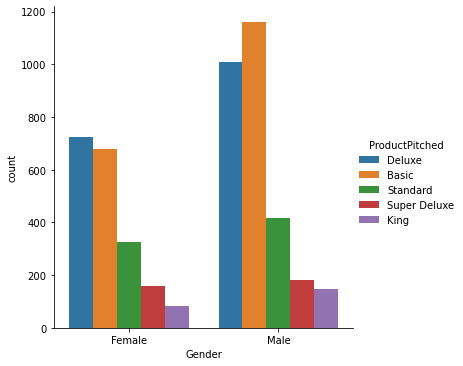

In [55]:
#Use a stack bar graph to explore relationahip between gender and prodct pitched
sns.catplot(x='Gender', data = data, kind = 'count', hue = 'ProductPitched')

In [56]:
# Compute the number of products purchased by product pitched
data.groupby(['ProductPitched','ProdTaken'])['Gender'].value_counts()

ProductPitched  ProdTaken  Gender
Basic           0          Male      818
                           Female    472
                1          Male      344
                           Female    208
Deluxe          0          Male      874
                           Female    654
                1          Male      134
                           Female     70
King            0          Male      140
                           Female     70
                1          Female     12
                           Male        8
Standard        0          Male      340
                           Female    278
                1          Male       76
                           Female     48
Super Deluxe    0          Male      166
                           Female    156
                1          Male       16
                           Female      4
Name: Gender, dtype: int64

In [57]:
# Compute the percentages of products purchased by product pitched
data.groupby(['ProductPitched','ProdTaken'])['Gender'].value_counts(normalize=True)*100

ProductPitched  ProdTaken  Gender
Basic           0          Male      63.410853
                           Female    36.589147
                1          Male      62.318841
                           Female    37.681159
Deluxe          0          Male      57.198953
                           Female    42.801047
                1          Male      65.686275
                           Female    34.313725
King            0          Male      66.666667
                           Female    33.333333
                1          Female    60.000000
                           Male      40.000000
Standard        0          Male      55.016181
                           Female    44.983819
                1          Male      61.290323
                           Female    38.709677
Super Deluxe    0          Male      51.552795
                           Female    48.447205
                1          Male      80.000000
                           Female    20.000000
Name: Gender, dtype: float

In [58]:
data.groupby(['ProductPitched','ProdTaken'])['Gender'].value_counts(normalize=True)*100

ProductPitched  ProdTaken  Gender
Basic           0          Male      63.410853
                           Female    36.589147
                1          Male      62.318841
                           Female    37.681159
Deluxe          0          Male      57.198953
                           Female    42.801047
                1          Male      65.686275
                           Female    34.313725
King            0          Male      66.666667
                           Female    33.333333
                1          Female    60.000000
                           Male      40.000000
Standard        0          Male      55.016181
                           Female    44.983819
                1          Male      61.290323
                           Female    38.709677
Super Deluxe    0          Male      51.552795
                           Female    48.447205
                1          Male      80.000000
                           Female    20.000000
Name: Gender, dtype: float

In [59]:
data.groupby(['Gender'])['ProdTaken'].value_counts(normalize=True)*100

Gender  ProdTaken
Female  0            82.657201
        1            17.342799
Male    0            80.178326
        1            19.821674
Name: ProdTaken, dtype: float64

#### Insights - Gender
- 'Fe Male' values replaced with 'Female to give 2 categories of values
- 2916 Female customers (40%) and 1972 Male customers (60%)
- Females were primarily pitched Deluxe (37%) and Basic (34%)
- Males were primarily pitched Basic (40%) and Deluxe (35%)
- Given that Females are 40% of the customer base, Basic pitched: 38% of customer were Female; Deluxed Pitched: 34% Female; King pitched, 40% female; Standard Pitched: 39% Female; Super deluxed pitched: 20% female (Male percentages are 100% - Female percentages
- Super Deluxe was taken by Females only 20% 9 while pitched to males 6% amd pitched to Females 8%
- Men have a slightly higher rate of purchse than women
 

#### Variable "Number of Persons Visiting" Analysis

<AxesSubplot:xlabel='NumberOfPersonVisiting'>

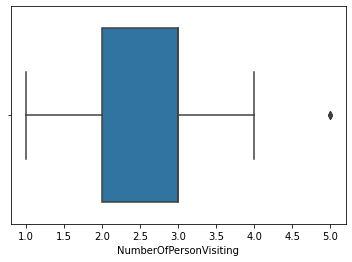

In [60]:
sns.boxplot(data=data, x='NumberOfPersonVisiting')

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='ProductPitched'>

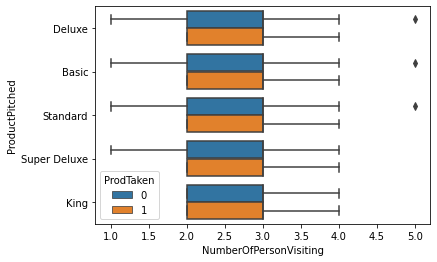

In [61]:
sns.boxplot(data=data, x='NumberOfPersonVisiting', y='ProductPitched', hue='ProdTaken')

In [62]:
data['NumberOfPersonVisiting'].value_counts()

3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64

In [63]:
data['NumberOfPersonVisiting'].value_counts(normalize=True)*100

3    49.140753
2    29.009820
4    20.990180
1     0.797872
5     0.061375
Name: NumberOfPersonVisiting, dtype: float64

In [64]:
# Compute the number of products purchased by product pitched
data.groupby(['ProductPitched','ProdTaken'])['NumberOfPersonVisiting'].value_counts()

ProductPitched  ProdTaken  NumberOfPersonVisiting
Basic           0          3                         635
                           2                         353
                           4                         292
                           1                           9
                           5                           1
                1          3                         276
                           2                         164
                           4                         112
Deluxe          0          3                         746
                           2                         455
                           4                         309
                           1                          17
                           5                           1
                1          3                         102
                           2                          56
                           4                          46
King            0          3          

In [65]:
# Compute the number of products purchased by product pitched
data.groupby(['ProductPitched','ProdTaken'])['NumberOfPersonVisiting'].value_counts(normalize=True)*100

ProductPitched  ProdTaken  NumberOfPersonVisiting
Basic           0          3                         49.224806
                           2                         27.364341
                           4                         22.635659
                           1                          0.697674
                           5                          0.077519
                1          3                         50.000000
                           2                         29.710145
                           4                         20.289855
Deluxe          0          3                         48.821990
                           2                         29.777487
                           4                         20.222513
                           1                          1.112565
                           5                          0.065445
                1          3                         50.000000
                           2                         27.450980
     

#### Insights - 'Number of Person Visiting'
- Values 1 and 5 appear to be outliers
- most impactful values for determining product taken is 2 and 3, which account for almost 80% of the values
- For Products taken: Ratios of Number of Persons Visiting: Percentage Product taken - Basic:3:50%, 2:30%, 4:20% (similar to base ratio); Deluxe: 3:50%, 2:27%; 4:23%; King - 3:50%; 2:30%; 4:20 (similar to base ratio); Standard - 3:50%; 2:27%; 4:23% (similar to base ratio); Super Deluxe - 3:50%, 2:40%,4:10% (varies slightly from base ratio but likely not enough for major impact

This variable does not appear to impact customer taking product pitched; will test feature impact during modeling

#### Variable 'Preferred Property Star' Analysis

In [66]:
data['PreferredPropertyStar'].value_counts()

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

In [67]:
data['PreferredPropertyStar'].value_counts(normalize=True)*100

3.0    61.559029
5.0    19.662690
4.0    18.778281
Name: PreferredPropertyStar, dtype: float64

In [68]:
#Group Preferred Property Star data by Product pitched
data.groupby(['PreferredPropertyStar'])['ProductPitched'].value_counts()

PreferredPropertyStar  ProductPitched
3.0                    Basic             1118
                       Deluxe            1090
                       Standard           436
                       Super Deluxe       212
                       King               137
4.0                    Basic              368
                       Deluxe             312
                       Standard           130
                       Super Deluxe        62
                       King                41
5.0                    Basic              355
                       Deluxe             329
                       Standard           175
                       Super Deluxe        68
                       King                29
Name: ProductPitched, dtype: int64

In [69]:
#Group Preferred Property Star data by Product pitched
data.groupby(['PreferredPropertyStar'])['ProductPitched'].value_counts(normalize = True)*100

PreferredPropertyStar  ProductPitched
3.0                    Basic             37.353826
                       Deluxe            36.418309
                       Standard          14.567324
                       Super Deluxe       7.083194
                       King               4.577347
4.0                    Basic             40.306681
                       Deluxe            34.173056
                       Standard          14.238773
                       Super Deluxe       6.790800
                       King               4.490690
5.0                    Basic             37.133891
                       Deluxe            34.414226
                       Standard          18.305439
                       Super Deluxe       7.112971
                       King               3.033473
Name: ProductPitched, dtype: float64

In [70]:
#Locate the rows where Preferred Property Star is Null
PPSNull = data[data['PreferredPropertyStar'].isna()]
PPSNull.shape

(26, 20)

In [71]:
PPSNull

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
38        200038          0  36.0     Self Enquiry         1             11.0   
2609      202609          0  51.0     Self Enquiry         1             18.0   
2634      202634          0  53.0     Self Enquiry         1              7.0   
3012      203012          1  56.0     Self Enquiry         1              9.0   
3190      203190          0  42.0  Company Invited         1             14.0   
3193      203193          1  53.0     Self Enquiry         3              9.0   
3214      203214          0  47.0     Self Enquiry         1              7.0   
3295      203295          0  57.0     Self Enquiry         1             11.0   
3342      203342          0  44.0     Self Enquiry         1             10.0   
3362      203362          0  52.0  Company Invited         3             16.0   
3400      203400          0  57.0     Self Enquiry         2             15.0   
3453      203453          0  59.0     Self Enquiry         1              7.0   
3598      203598          0  48.0     Self Enquiry         2             33.0   
3686      203686          0  41.0     Self Enquiry         3             14.0   
3775      203775          0  49.0     Self Enquiry         1             17.0   
3845      203845          0  56.0     Self Enquiry         2             33.0   
4079      204079          0  51.0     Self Enquiry         1             18.0   
4104      204104          0  53.0     Self Enquiry         1              7.0   
4482      204482          1  56.0     Self Enquiry         1              9.0   
4660      204660          0  42.0  Company Invited         1             14.0   
4663      204663          1  53.0     Self Enquiry         3              9.0   
4684      204684          0  47.0     Self Enquiry         1              7.0   
4765      204765          0  57.0     Self Enquiry         1             11.0   
4812      204812          0  44.0     Self Enquiry         1             10.0   
4832      204832          1  52.0  Company Invited         1             35.0   
4870      204870          1  57.0     Self Enquiry         3             23.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
38          Salaried  Female                       2                4.0   
2609        Salaried  Female                       3                4.0   
2634        Salaried    Male                       4                5.0   
3012  Small Business    Male                       4                4.0   
3190        Salaried  Female                       3                6.0   
3193  Small Business  Female                       3                6.0   
3214  Small Business    Male                       3                4.0   
3295  Large Business  Female                       4                4.0   
3342        Salaried    Male                       4                6.0   
3362        Salaried    Male                       3                4.0   
3400        Salaried    Male                       3                4.0   
3453  Small Business  Female                       4                4.0   
3598        Salaried  Female                       4                4.0   
3686  Small Business    Male                       3                4.0   
3775        Salaried    Male                       4                5.0   
3845        Salaried    Male                       4                2.0   
4079        Salaried  Female                       3                4.0   
4104        Salaried    Male                       4                5.0   
4482  Small Business    Male                       4                4.0   
4660        Salaried  Female                       3                6.0   
4663  Small Business  Female                       3                6.0   
4684  Small Business    Male                       3                4.0   
4765  Large Business  Female                       4                4.0   
4812        Salari

In [72]:
#Group Preferred Property Star data by Product pitched
data.groupby(['ProductPitched'])['PreferredPropertyStar'].median()

ProductPitched
Basic           3.0
Deluxe          3.0
King            3.0
Standard        3.0
Super Deluxe    3.0
Name: PreferredPropertyStar, dtype: float64

In [73]:
#Impute Median (3) for Null values
data['PreferredPropertyStar'] = data.groupby(['ProductPitched'], sort=False)['PreferredPropertyStar'].apply(lambda x: x.fillna(x.median()))

data['PreferredPropertyStar'].isnull().sum()

0

In [74]:
# Compute the number of products purchased by product pitched
data.groupby(['ProductPitched','ProdTaken'])['PreferredPropertyStar'].value_counts()

ProductPitched  ProdTaken  PreferredPropertyStar
Basic           0          3.0                      837
                           4.0                      254
                           5.0                      199
                1          3.0                      282
                           5.0                      156
                           4.0                      114
Deluxe          0          3.0                      976
                           4.0                      276
                           5.0                      276
                1          3.0                      115
                           5.0                       53
                           4.0                       36
King            0          3.0                      150
                           4.0                       33
                           5.0                       27
                1          3.0                       10
                           4.0                        8

In [75]:
data.groupby(['ProductPitched','ProdTaken'])['PreferredPropertyStar'].value_counts(normalize=True)*100

ProductPitched  ProdTaken  PreferredPropertyStar
Basic           0          3.0                      64.883721
                           4.0                      19.689922
                           5.0                      15.426357
                1          3.0                      51.086957
                           5.0                      28.260870
                           4.0                      20.652174
Deluxe          0          3.0                      63.874346
                           4.0                      18.062827
                           5.0                      18.062827
                1          3.0                      56.372549
                           5.0                      25.980392
                           4.0                      17.647059
King            0          3.0                      71.428571
                           4.0                      15.714286
                           5.0                      12.857143
                1    

In [76]:
data.groupby(['ProdTaken'])['PreferredPropertyStar'].value_counts(normalize=True)*100

ProdTaken  PreferredPropertyStar
0          3.0                      63.785282
           4.0                      18.422379
           5.0                      17.792339
1          3.0                      53.043478
           5.0                      27.173913
           4.0                      19.782609
Name: PreferredPropertyStar, dtype: float64

In [77]:
data.groupby(['PreferredPropertyStar'])['ProdTaken'].value_counts(normalize=True)*100

PreferredPropertyStar  ProdTaken
3.0                    0            83.835707
                       1            16.164293
4.0                    0            80.065717
                       1            19.934283
5.0                    0            73.849372
                       1            26.150628
Name: ProdTaken, dtype: float64

In [78]:
data.groupby(['ProductPitched','ProdTaken'])['PreferredPropertyStar'].value_counts(normalize=True)*100

ProductPitched  ProdTaken  PreferredPropertyStar
Basic           0          3.0                      64.883721
                           4.0                      19.689922
                           5.0                      15.426357
                1          3.0                      51.086957
                           5.0                      28.260870
                           4.0                      20.652174
Deluxe          0          3.0                      63.874346
                           4.0                      18.062827
                           5.0                      18.062827
                1          3.0                      56.372549
                           5.0                      25.980392
                           4.0                      17.647059
King            0          3.0                      71.428571
                           4.0                      15.714286
                           5.0                      12.857143
                1    

#### Insights - 'PreferredPropertyStar'
    - 26 missing values replaced with median 3
    - The median preferred property star is 3 regardless of product pitched
    - Basic and Deluxe products are pitched most frequently regardless of Property star value
    - Before null replacement, Customers star proprties as follow: 3:62%;4:19%; 5:20%
    - ProdTaken Basic:3:51%; 5:38%; 4:20%; Deluxe:3:56%; 5:26%; 4:18%; King:3:50%;4:40%; 5:10%; Standard:3:56%; 5:28%; 4:16%; Super Deluxe:3:60%; 4:20%; 5:20%
    - Preferred Property star and rate of purchase: 3:16%; 4:20%; 5:26% 
    - Preferred property star appears to influence product purchase
    

#### Variable 'Marital Status' Analysis

In [79]:
data['MaritalStatus'].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [80]:
#Replace Single with Unmarried
data['MaritalStatus'].replace('Single','Unmarried', regex = True, inplace =True)

In [81]:
data['MaritalStatus'].value_counts()

Married      2340
Unmarried    1598
Divorced      950
Name: MaritalStatus, dtype: int64

In [82]:

data.groupby(['MaritalStatus'])['ProdTaken'].value_counts(normalize=True)*100

MaritalStatus  ProdTaken
Divorced       0            86.947368
               1            13.052632
Married        0            86.068376
               1            13.931624
Unmarried      0            70.588235
               1            29.411765
Name: ProdTaken, dtype: float64

In [83]:
#Divorced and Unmarried have the same rate of purchase and are essentially the same status, therefore combine into one value: Unmarried
data['MaritalStatus'].replace('Divorced','Unmarried', regex = True, inplace =True)
data['MaritalStatus'].value_counts(normalize=True)*100

Unmarried    52.12766
Married      47.87234
Name: MaritalStatus, dtype: float64

In [84]:
data.groupby(['MaritalStatus'])['ProdTaken'].value_counts(normalize=True)*100

MaritalStatus  ProdTaken
Married        0            86.068376
               1            13.931624
Unmarried      0            76.687598
               1            23.312402
Name: ProdTaken, dtype: float64

In [85]:
# Compute the number of products taken purchased by product pitched
data.groupby(['ProductPitched','MaritalStatus'])['ProdTaken'].value_counts()

ProductPitched  MaritalStatus  ProdTaken
Basic           Married        0            628
                               1            188
                Unmarried      0            662
                               1            364
Deluxe          Married        0            784
                               1             68
                Unmarried      0            744
                               1            136
King            Married        0            120
                               1              6
                Unmarried      0             90
                               1             14
Standard        Married        0            324
                               1             56
                Unmarried      0            294
                               1             68
Super Deluxe    Married        0            158
                               1              8
                Unmarried      0            164
                               1             12

In [86]:
# Compute the number of products taken purchased by product pitched
data.groupby(['ProductPitched','MaritalStatus'])['ProdTaken'].value_counts(normalize=True)*100

ProductPitched  MaritalStatus  ProdTaken
Basic           Married        0            76.960784
                               1            23.039216
                Unmarried      0            64.522417
                               1            35.477583
Deluxe          Married        0            92.018779
                               1             7.981221
                Unmarried      0            84.545455
                               1            15.454545
King            Married        0            95.238095
                               1             4.761905
                Unmarried      0            86.538462
                               1            13.461538
Standard        Married        0            85.263158
                               1            14.736842
                Unmarried      0            81.215470
                               1            18.784530
Super Deluxe    Married        0            95.180723
                               1         

In [87]:
#Group Marital Status data by Product pitched
data.groupby(['ProductPitched'])['MaritalStatus'].value_counts()

ProductPitched  MaritalStatus
Basic           Unmarried        1026
                Married           816
Deluxe          Unmarried         880
                Married           852
King            Married           126
                Unmarried         104
Standard        Married           380
                Unmarried         362
Super Deluxe    Unmarried         176
                Married           166
Name: MaritalStatus, dtype: int64

In [88]:
#Group Marital Status data by Product pitched
data.groupby(['ProductPitched'])['MaritalStatus'].value_counts(normalize=True)*100

ProductPitched  MaritalStatus
Basic           Unmarried        55.700326
                Married          44.299674
Deluxe          Unmarried        50.808314
                Married          49.191686
King            Married          54.782609
                Unmarried        45.217391
Standard        Married          51.212938
                Unmarried        48.787062
Super Deluxe    Unmarried        51.461988
                Married          48.538012
Name: MaritalStatus, dtype: float64

#### Insights - Marital Status
- Combined 3 values, Single, Divorced, Unmarried into one value: Unmarried
- Unmarried:Married = 52%:48%
- Unmarried:Married ProdTaken = 23%:14%
- ProdPitched:Marritalstatus:ProdTaken - Basic:Unmarried: 35% ; Married:23%; Deluxe: Unmarried:7%;Married: 15%; King: Unmarried:5%; Married:13%; Standard: Unmarried: 19%; Married: 15%; Super Deluxe: Unmarried: 7%; Married: 5%
- Married are more likely to purchase Deluxe.


#### Variable 'Number of Trips' Analysis

<AxesSubplot:xlabel='NumberOfTrips'>

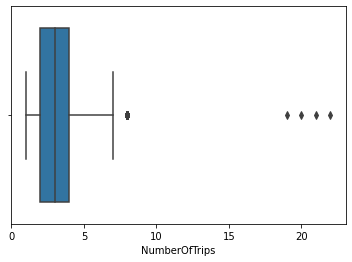

In [89]:
#Check Distribution of data
sns.boxplot(data = data, x='NumberOfTrips')

In [90]:
#View rows will Number of trips  is null
NOT_Null = data[data['NumberOfTrips'].isna()]
NOT_Null.shape

(140, 20)

In [91]:
NOT_Null

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
2469      202469          0  54.0     Self Enquiry         1             12.0   
2473      202473          0  47.0     Self Enquiry         3              9.0   
2506      202506          0  51.0     Self Enquiry         1             14.0   
2549      202549          0  60.0  Company Invited         2              9.0   
2550      202550          0  51.0  Company Invited         1              7.0   
...          ...        ...   ...              ...       ...              ...   
4836      204836          1  45.0     Self Enquiry         3             16.0   
4850      204850          1  46.0     Self Enquiry         3              8.0   
4851      204851          1  40.0     Self Enquiry         1              9.0   
4868      204868          1  43.0  Company Invited         2             15.0   
4869      204869          1  56.0     Self Enquiry         3             16.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
2469        Salaried  Female                       3                4.0   
2473  Small Business  Female                       3                4.0   
2506  Small Business  Female                       3                5.0   
2549        Salaried  Female                       3                5.0   
2550        Salaried  Female                       4                4.0   
...              ...     ...                     ...                ...   
4836        Salaried    Male                       4                5.0   
4850        Salaried    Male                       4                5.0   
4851        Salaried  Female                       4                4.0   
4868        Salaried  Female                       4                5.0   
4869  Small Business  Female                       3                6.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
2469           King                    3.0       Married            NaN   
2473           King                    5.0     Unmarried            NaN   
2506           King                    3.0       Married            NaN   
2549           King                    3.0     Unmarried            NaN   
2550           King                    4.0     Unmarried            NaN   
...             ...                    ...           ...            ...   
4836          Basic                    5.0       Married            NaN   
4850         Deluxe                    5.0       Married            NaN   
4851          Basic                    5.0       Married            NaN   
4868          Basic                    3.0       Married            NaN   
4869          Basic                    4.0     Unmarried            NaN   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
2469         0                       5       0                       2.0   
2473         0                       2       0                       2.0   
2506         1                       4       1                       2.0   
2549         0                       2       1                       2.0   
2550         1                       2       0                       3.0   
...        ...                     ...     ...                       ...   
4836         0                       1       1                       3.0   
4850         0                       4       1                       3.0   
4851         1                       1       1                       1.0   
4868         0                       5       1                       2.0   
4869         0                       1       1                       2.0   

     Designation  MonthlyIncome  
2469          VP        37772.0  
2473          VP        37625.0  
2506          VP        37418.0  
2549          VP        37522.0  
2550          VP        36850.0  
...          ...            ...  
4836   Executive        37868.0  
4850     Manager        36739.0  
4851   Execu

In [92]:
#Determine Number of Trips median grouped by Product Pitched  
data.groupby(['ProductPitched'])['NumberOfTrips'].median()

ProductPitched
Basic           3.0
Deluxe          3.0
King            3.0
Standard        3.0
Super Deluxe    3.0
Name: NumberOfTrips, dtype: float64

In [93]:
data['NumberOfTrips'].describe()
#Median and Mean are similar; data appears to be somewhat normally distributed

count    4748.000000
mean        3.236521
std         1.849019
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        22.000000
Name: NumberOfTrips, dtype: float64

In [94]:
# Impute null values with Product pitched group median
data['NumberOfTrips'] = data.groupby(['ProductPitched'], sort=False)['NumberOfTrips'].apply(lambda x: x.fillna(x.median()))

data['NumberOfTrips'].isnull().sum()

0

In [95]:
data['NumberOfTrips'].describe()

count    4888.000000
mean        3.229746
std         1.822769
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        22.000000
Name: NumberOfTrips, dtype: float64

<AxesSubplot:xlabel='NumberOfTrips'>

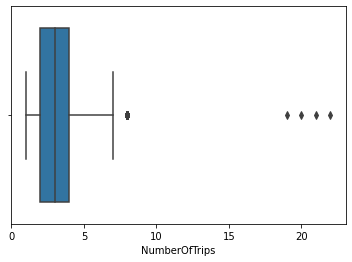

In [96]:
#Check Distribution of data
sns.boxplot(data = data, x='NumberOfTrips')

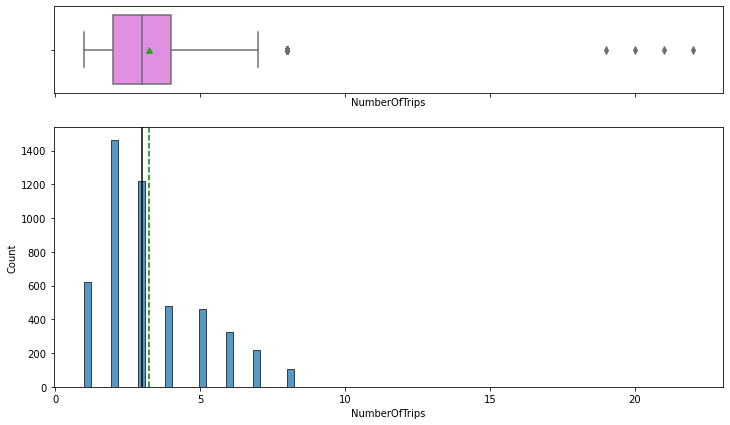

In [97]:
histogram_boxplot(data, "NumberOfTrips")

In [103]:
# Four outliers in data: 19, 20, 21, 22

In [98]:
data.groupby(['ProductPitched'])['NumberOfTrips'].median()

ProductPitched
Basic           3.0
Deluxe          3.0
King            3.0
Standard        3.0
Super Deluxe    3.0
Name: NumberOfTrips, dtype: float64

In [99]:
data.groupby(['ProductPitched','ProdTaken'])['NumberOfTrips'].median()

ProductPitched  ProdTaken
Basic           0            3.0
                1            3.0
Deluxe          0            3.0
                1            3.0
King            0            3.0
                1            3.0
Standard        0            3.0
                1            2.5
Super Deluxe    0            3.0
                1            2.0
Name: NumberOfTrips, dtype: float64

In [100]:
data['NumberOfTrips'].value_counts(normalize=True)*100

2.0     29.950900
3.0     24.938625
1.0     12.684124
4.0      9.779051
5.0      9.369885
6.0      6.587561
7.0      4.459902
8.0      2.148118
21.0     0.020458
19.0     0.020458
22.0     0.020458
20.0     0.020458
Name: NumberOfTrips, dtype: float64

In [101]:
data.groupby(['NumberOfTrips'])['ProdTaken'].value_counts(normalize=True)*100

NumberOfTrips  ProdTaken
1.0            0             81.935484
               1             18.064516
2.0            0             79.576503
               1             20.423497
3.0            0             81.214110
               1             18.785890
4.0            0             87.238494
               1             12.761506
5.0            0             86.462882
               1             13.537118
6.0            0             80.124224
               1             19.875776
7.0            0             71.559633
               1             28.440367
8.0            0             72.380952
               1             27.619048
19.0           1            100.000000
20.0           1            100.000000
21.0           0            100.000000
22.0           0            100.000000
Name: ProdTaken, dtype: float64

#### Insights - Number of Trips
    - 140 Null values replaced with Median
    - 4 outliers identified: 19, 20, 21, 22: 2 outliers result in ProdTaken; 2 result Prod not taken
    - Median Number of Trips (and median for each ProductPitched subset) is 3 trips
    - Data is not normally distributed; it is skewed right
    - 30% of data points - 2 days, 24% - 3 days, 13% - 1 day; Number of Trips seems to affect ProdTaken for Number of Trips greater than 3; the more trips taken the higher the percentage of prodTaken with 7 and 8 days approximaltey equal at 18.4% and 27.6%, respectively

#### Variable 'Passport' Analysis

In [105]:
data['Passport'].value_counts(normalize=True)*100

0    70.908347
1    29.091653
Name: Passport, dtype: float64

In [106]:
#Understand how many Passport holders buy the product
data.groupby(['ProdTaken'])['Passport'].value_counts(normalize=True)*100

ProdTaken  Passport
0          0           76.612903
           1           23.387097
1          1           53.695652
           0           46.304348
Name: Passport, dtype: float64

In [107]:
data.groupby(['ProductPitched'])['Passport'].value_counts(normalize=True)*100

ProductPitched  Passport
Basic           0           69.163952
                1           30.836048
Deluxe          0           72.286374
                1           27.713626
King            0           73.913043
                1           26.086957
Standard        0           71.698113
                1           28.301887
Super Deluxe    0           69.590643
                1           30.409357
Name: Passport, dtype: float64

In [109]:
# Compute the number of products taken purchased by product pitched 
data.groupby(['ProductPitched','Passport'])['ProdTaken'].value_counts(normalize=True)*100

ProductPitched  Passport  ProdTaken
Basic           0         0            81.946625
                          1            18.053375
                1         1            56.690141
                          0            43.309859
Deluxe          0         0            91.693291
                          1             8.306709
                1         0            79.166667
                          1            20.833333
King            0         0            95.294118
                          1             4.705882
                1         0            80.000000
                          1            20.000000
Standard        0         0            85.714286
                          1            14.285714
                1         0            77.142857
                          1            22.857143
Super Deluxe    0         0            96.638655
                          1             3.361345
                1         0            88.461538
                          1      

In [110]:
# Compute the number of products taken purchased by passport 
data.groupby(['Passport'])['ProdTaken'].value_counts(normalize=True)*100

Passport  ProdTaken
0         0            87.709175
          1            12.290825
1         0            65.260197
          1            34.739803
Name: ProdTaken, dtype: float64

In [111]:
# Compute the number of products taken purchased by passport
data.groupby(['Passport','ProductPitched'])['ProdTaken'].value_counts(normalize=True)*100

Passport  ProductPitched  ProdTaken
0         Basic           0            81.946625
                          1            18.053375
          Deluxe          0            91.693291
                          1             8.306709
          King            0            95.294118
                          1             4.705882
          Standard        0            85.714286
                          1            14.285714
          Super Deluxe    0            96.638655
                          1             3.361345
1         Basic           1            56.690141
                          0            43.309859
          Deluxe          0            79.166667
                          1            20.833333
          King            0            80.000000
                          1            20.000000
          Standard        0            77.142857
                          1            22.857143
          Super Deluxe    0            88.461538
                          1      

#### Insights - Passport
   - 29% of customers hold passports
   - Passportholding does not appeat to greatly impact the product pitched but does appear to affect ProdTaken sepcifically those cusotmers who take the Basic Product

#### Variable 'Owns Car' Analysis

In [112]:
data['OwnCar'].value_counts(normalize=True)*100

1    62.02946
0    37.97054
Name: OwnCar, dtype: float64

In [114]:
data.groupby(['ProdTaken'])['OwnCar'].value_counts(normalize=True)*100

ProdTaken  OwnCar
0          1         62.298387
           0         37.701613
1          1         60.869565
           0         39.130435
Name: OwnCar, dtype: float64

In [118]:
data.groupby(['ProductPitched'])['OwnCar'].value_counts()

ProductPitched  OwnCar
Basic           1         1084
                0          758
Deluxe          1         1058
                0          674
King            1          166
                0           64
Standard        1          484
                0          258
Super Deluxe    1          240
                0          102
Name: OwnCar, dtype: int64

In [116]:
data.groupby(['ProductPitched'])['OwnCar'].value_counts(normalize=True)*100

ProductPitched  OwnCar
Basic           1         58.849077
                0         41.150923
Deluxe          1         61.085450
                0         38.914550
King            1         72.173913
                0         27.826087
Standard        1         65.229111
                0         34.770889
Super Deluxe    1         70.175439
                0         29.824561
Name: OwnCar, dtype: float64

In [119]:
data.groupby(['ProductPitched','ProdTaken'])['OwnCar'].value_counts()

ProductPitched  ProdTaken  OwnCar
Basic           0          1         768
                           0         522
                1          1         316
                           0         236
Deluxe          0          1         934
                           0         594
                1          1         124
                           0          80
King            0          1         148
                           0          62
                1          1          18
                           0           2
Standard        0          1         402
                           0         216
                1          1          82
                           0          42
Super Deluxe    0          1         220
                           0         102
                1          1          20
Name: OwnCar, dtype: int64

In [117]:
data.groupby(['ProductPitched','ProdTaken'])['OwnCar'].value_counts(normalize=True)*100

ProductPitched  ProdTaken  OwnCar
Basic           0          1          59.534884
                           0          40.465116
                1          1          57.246377
                           0          42.753623
Deluxe          0          1          61.125654
                           0          38.874346
                1          1          60.784314
                           0          39.215686
King            0          1          70.476190
                           0          29.523810
                1          1          90.000000
                           0          10.000000
Standard        0          1          65.048544
                           0          34.951456
                1          1          66.129032
                           0          33.870968
Super Deluxe    0          1          68.322981
                           0          31.677019
                1          1         100.000000
Name: OwnCar, dtype: float64

#### Insights - Own Car
    - 62% of customers own a car
    - ProdTaken does not appear greatly impacted by car ownership, although product pitch does with King, Standard and Super Deluxe products pitched to car owners at a higher rate than Basic and Deluxe
    - Customers who buy the King and Super Deluxe Products have a higher rate of car ownership (90% and 100%) than those who take the other products (however these groups have a small number of customer each so consider size in evaluation)
    - For Basic and Deluxe,the rate of car owners is approximately the rate of purchase
    

#### Variable 'NumberOfChildrenVisiting' Analysis


In [121]:
data['NumberOfChildrenVisiting'].value_counts(normalize=True)*100

1.0    43.135628
2.0    27.685608
0.0    22.438822
3.0     6.739942
Name: NumberOfChildrenVisiting, dtype: float64

In [122]:
data.groupby(['ProdTaken'])['NumberOfChildrenVisiting'].value_counts()

ProdTaken  NumberOfChildrenVisiting
0          1.0                         1688
           2.0                         1082
           0.0                          880
           3.0                          259
1          1.0                          392
           2.0                          253
           0.0                          202
           3.0                           66
Name: NumberOfChildrenVisiting, dtype: int64

In [123]:
data.groupby(['ProdTaken'])['NumberOfChildrenVisiting'].value_counts(normalize=True)*100

ProdTaken  NumberOfChildrenVisiting
0          1.0                         43.182400
           2.0                         27.679713
           0.0                         22.512151
           3.0                          6.625735
1          1.0                         42.935378
           2.0                         27.710843
           0.0                         22.124863
           3.0                          7.228916
Name: NumberOfChildrenVisiting, dtype: float64

In [124]:
data.groupby(['NumberOfChildrenVisiting'])['ProdTaken'].value_counts()

NumberOfChildrenVisiting  ProdTaken
0.0                       0             880
                          1             202
1.0                       0            1688
                          1             392
2.0                       0            1082
                          1             253
3.0                       0             259
                          1              66
Name: ProdTaken, dtype: int64

In [126]:
data.groupby(['NumberOfChildrenVisiting'])['ProdTaken'].value_counts(normalize=True)*100

NumberOfChildrenVisiting  ProdTaken
0.0                       0            81.330869
                          1            18.669131
1.0                       0            81.153846
                          1            18.846154
2.0                       0            81.048689
                          1            18.951311
3.0                       0            79.692308
                          1            20.307692
Name: ProdTaken, dtype: float64

In [127]:
data.groupby(['NumberOfChildrenVisiting'])['ProductPitched'].value_counts()

NumberOfChildrenVisiting  ProductPitched
0.0                       Basic             404
                          Deluxe            391
                          Standard          172
                          Super Deluxe       84
                          King               31
1.0                       Basic             793
                          Deluxe            754
                          Standard          318
                          Super Deluxe      126
                          King               89
2.0                       Basic             517
                          Deluxe            474
                          Standard          198
                          Super Deluxe       74
                          King               72
3.0                       Basic             127
                          Deluxe            112
                          Standard           53
                          King               17
                          Super Deluxe       16

In [128]:
data.groupby(['NumberOfChildrenVisiting'])['ProductPitched'].value_counts(normalize = True)*100

NumberOfChildrenVisiting  ProductPitched
0.0                       Basic             37.338262
                          Deluxe            36.136784
                          Standard          15.896488
                          Super Deluxe       7.763401
                          King               2.865065
1.0                       Basic             38.125000
                          Deluxe            36.250000
                          Standard          15.288462
                          Super Deluxe       6.057692
                          King               4.278846
2.0                       Basic             38.726592
                          Deluxe            35.505618
                          Standard          14.831461
                          Super Deluxe       5.543071
                          King               5.393258
3.0                       Basic             39.076923
                          Deluxe            34.461538
                          Standard       

#### Insights - Number of Children Visiting
    - The number of children under 5 does not appear to affect the overall 4 to 1 ratio of ProdTaken No to Yes
    - The number of children under 5 does not appear to affect the type of project pitched other than a slightly higher than normal Super Deluxe pitch for those having 0.0 children visiting. The Percentages are as follows: Basic ~ 38%, Deluxe ~35%, Standard ~15%, King ~ 4% and Super Deluxe ~ 6%

#### Variable 'Designation' Analysis
NOTE: AVP and VP are corporate executive positions therefore I will combine AVP, VP and Executives into one category: Executive

In [129]:
data['Designation'].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [130]:
data['Designation'].value_counts(normalize=True)*100

Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: Designation, dtype: float64

In [132]:
#Replace AVP and VP with Executive with 'Female'
data['Designation'].replace('AVP','Executive', regex = True, inplace =True)
data['Designation'].replace('VP','Executive', regex = True, inplace =True)

In [133]:
data['Designation'].value_counts(normalize=True)*100

Executive         49.386252
Manager           35.433715
Senior Manager    15.180033
Name: Designation, dtype: float64

In [134]:
data.groupby(['ProdTaken'])['Designation'].value_counts()

ProdTaken  Designation   
0          Executive         1822
           Manager           1528
           Senior Manager     618
1          Executive          592
           Manager            204
           Senior Manager     124
Name: Designation, dtype: int64

In [135]:
data.groupby(['ProdTaken'])['Designation'].value_counts(normalize = True)*100

ProdTaken  Designation   
0          Executive         45.917339
           Manager           38.508065
           Senior Manager    15.574597
1          Executive         64.347826
           Manager           22.173913
           Senior Manager    13.478261
Name: Designation, dtype: float64

In [136]:
data.groupby(['Designation'])['ProdTaken'].value_counts(normalize = True)*100

Designation     ProdTaken
Executive       0            75.476388
                1            24.523612
Manager         0            88.221709
                1            11.778291
Senior Manager  0            83.288410
                1            16.711590
Name: ProdTaken, dtype: float64

In [137]:
data.groupby(['ProductPitched'])['Designation'].value_counts()

ProductPitched  Designation   
Basic           Executive         1842
Deluxe          Manager           1732
King            Executive          230
Standard        Senior Manager     742
Super Deluxe    Executive          342
Name: Designation, dtype: int64

In [138]:
data.groupby(['Designation'])['ProductPitched'].value_counts()

Designation     ProductPitched
Executive       Basic             1842
                Super Deluxe       342
                King               230
Manager         Deluxe            1732
Senior Manager  Standard           742
Name: ProductPitched, dtype: int64

#### Insights - Designation
    - VP, AVP and Executive were rolled into one category: Executive
    - Executives purchsed products at a rate of 25%, Senior Managers at a rate of 17% and Managers at a rate of 12%
    - This data is suspect as it does not have designations hierarchically lower than manager, and products pitched to Managers were exclusively Deluxe and to Senior Managers exclusively Standard
    - Consider dropping this variable from the model for not appropriate to context


#### Variable 'Monthly Income'Analysis
    - 

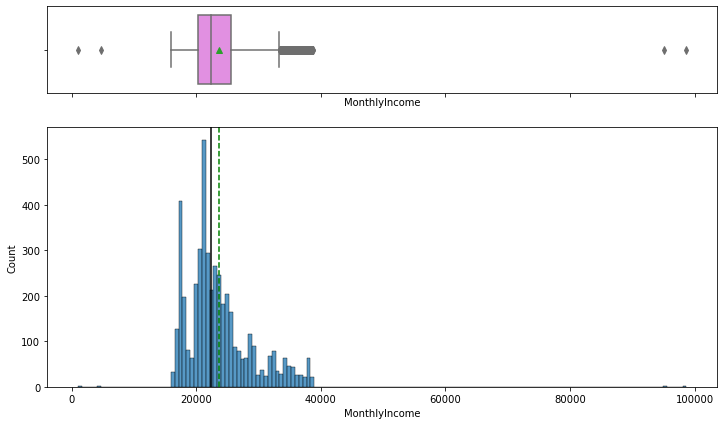

In [139]:
# View Distribution of Numeric variable Monthly Income
histogram_boxplot(data, "MonthlyIncome")

In [141]:
data['MonthlyIncome'].isnull().sum()

233

In [142]:
# View rows containing where monthlu Income is Null

MI_Null = data[data['MonthlyIncome'].isna()]
MI_Null.shape

(233, 20)

In [143]:
MI_Null.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
11      200011          0  36.0     Self Enquiry         1             21.0   
19      200019          0  32.0     Self Enquiry         1              8.0   
20      200020          0  36.0  Company Invited         1             17.0   
26      200026          1  32.0  Company Invited         1             22.0   
44      200044          0  36.0  Company Invited         1              6.0   

        Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
11        Salaried  Female                       2                4.0   
19        Salaried    Male                       2                3.0   
20        Salaried  Female                       3                2.0   
26        Salaried  Female                       3                5.0   
44  Small Business  Female                       2                3.0   

   ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
11         Deluxe                    3.0     Unmarried            1.0   
19          Basic                    3.0     Unmarried            6.0   
20         Deluxe                    3.0       Married            1.0   
26          Basic                    5.0     Unmarried            2.0   
44         Deluxe                    3.0     Unmarried            2.0   

    Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
11         1                       3       0                       0.0   
19         1                       4       0                       1.0   
20         0                       3       1                       2.0   
26         1                       4       1                       2.0   
44         0                       3       1                       0.0   

   Designation  MonthlyIncome  
11     Manager            NaN  
19   Executive            NaN  
20     Manager            NaN  
26   Executive            NaN  
44     Manager            NaN

In [144]:
#Description stats for Monthly Income
data['MonthlyIncome'].describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [145]:
#View Monthly Income Median by Designation
data.groupby(['Designation'])['MonthlyIncome'].median()


Designation
Executive         21151.0
Manager           22922.0
Senior Manager    26425.0
Name: MonthlyIncome, dtype: float64

In [ ]:
# Designation and monthly income medians do not make sense as Senior Manager Income medians are higher that Executives.
# 

In [146]:
data.groupby(['Occupation'])['MonthlyIncome'].median()

Occupation
Free Lancer       18929.0
Large Business    21866.0
Salaried          22130.0
Small Business    22689.0
Name: MonthlyIncome, dtype: float64

In [149]:
data.groupby(['ProductPitched'])['MonthlyIncome'].median()

ProductPitched
Basic           20689.0
Deluxe          22922.0
King            34999.0
Standard        26425.0
Super Deluxe    32181.0
Name: MonthlyIncome, dtype: float64

In [147]:
data.groupby(['ProdTaken'])['MonthlyIncome'].median()

ProdTaken
0    22729.0
1    21172.0
Name: MonthlyIncome, dtype: float64

In [148]:
data.groupby(['ProductPitched','ProdTaken'])['MonthlyIncome'].median()

ProductPitched  ProdTaken
Basic           0            20691.5
                1            20582.0
Deluxe          0            22905.0
                1            23186.0
King            0            35859.0
                1            34859.0
Standard        0            26558.0
                1            25711.0
Super Deluxe    0            32251.5
                1            29802.5
Name: MonthlyIncome, dtype: float64

#### Insights - Monthly Income
    - Monthly Income has 233 null values which will need to be imputed with Median of associated ProductPitched Groups.
    - Before imputing median, MonthlyIncome outliers need to be treated as some outliers may be having a significant influence on medians monthly incomes of Product Pitched groups. This will be accomplished during feature engineering
    - Currently, before Null and Outlier issues have been resolved, Monthly Income does appear to influence the purchase of Products: Basic: 20582, Deluxe: 23186, King: 34859, Standard: 25711, and Super Deluxe: 29802

## Section 2: EDA Insights

#### Customer details
- CustomerID: Unique customer I
    - Column will be dropped for model build
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
    - approximately a 4 to 1 ratio of 0(No) to 1(Yes)
    - This variable will be the target valriable for the model
    - no nulls therefore this variable is ready for model build
- Age: Age of customer
    - Min:18; Max:61; Mean:37;Median:36; data is likely not skewed right or left
    - Data Distribution is ready for model build (appears somewhat normal)
    - 226 null values imputed with Median of product Pitched group membership
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
    - 25 null values imputed with mode given Product Pitched
    - Customers who self-inquiry (71%) outnumber customers (29%) who are invited by the company
    - Both types of customers are initially pitched Basic and Deluxe products (although self-inquiry are pitched slightly more Basic than Deluxe and vice versa for company invited)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
    - CityTier 1 - Product pitched - 46% Basic and 28% Deluxe
    - City Tier 2 is similar to City Tier 1 with 55% Basic and 20% Deluxe
    - City Tier 3 is different from City Tier 1 and City Tier 2 with 52% Deluxe and 19% Standard; Basic accounts for 18% of products pitched
- Occupation: Occupation of customer
    - Free Lancer has only 2 values and therefore will add little information to the model
    - Large Business are primarily pitched Basic (45%) and Deluxe (29%) products
    - Salaried are primarily pitched Basic (39%) and Deluxe (35%) which is similar to Large Business
    - Small Business are primarily pitched Deluxe (38%) and Basic (24%)
    - Standard product is pitched to three Occupation groups (Large Business, Salaried and Small Business) 19%, 14% and 15%, respectively.
- Gender: Gender of customer
    - 'Fe Male' values replaced with 'Female to give 2 categories of values
    - 2916 Female customers (40%) and 1972 Male customers (60%)
    - Females were primarily pitched Deluxe (37%) and Basic (34%)
    - Males were primarily pitched Basic (40%) and Deluxe (35%)
    - Given that Females are 40% of the customer base, Basic pitched: 38% of customer were Female; Deluxed Pitched: 34% Female; King pitched, 40% female; Standard Pitched: 39% Female; Super deluxed pitched: 20% female (Male percentages are 100% - Female percentages
    - Super Deluxe was taken by Females only 20% 9 while pitched to males 6% amd pitched to Females 8%
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
    - Values 1 and 5 appear to be outliers
    - most impactful values for determining product taken is 2 and 3, which account for almost 80% of the values
    - For Products taken: Ratios of Number of Persons Visiting: Percentage Product taken - Basic:3:50%, 2:30%, 4:20% (similar to base ratio); Deluxe: 3:50%, 2:27%; 4:23%; King - 3:50%; 2:30%; 4:20 (similar to base ratio); Standard - 3:50%; 2:27%; 4:23% (similar to base ratio); Super Deluxe - 3:50%, 2:40%,4:10% (varies slightly from base ratio but likely not enough for major impact
    - This variable does not appear to impact customer taking product pitched; will test feature impact during modeling
- PreferredPropertyStar: Preferred hotel property rating by customer
    - 26 missing values replaced with median 3
    - The median preferred property star is 3 regardless of product pitched
    - Basic and Deluxe products are pitched most frequently regardless of Property star value
    - Before null replacement, Customers star proprties as follow: 3:62%;4:19%; 5:20%
    - ProdTaken Basic:3:51%; 5:38%; 4:20%; Deluxe:3:56%; 5:26%; 4:18%; King:3:50%;4:40%; 5:10%; Standard:3:56%; 5:28%; 4:16%; Super Deluxe:3:60%; 4:20%; 5:20%
    - Preferred Property star and rate of purchase: 3:16%; 4:20%; 5:26% 
    - Preferred property star appears to influence product purchase
- MaritalStatus: Marital status of customer
    - Combined 3 values, Single, Divorced, Unmarried into one value: Unmarried
    - Unmarried:Married = 52%:48%
    - Unmarried:Married ProdTaken = 23%:14%
    - ProdPitched:Marritalstatus:ProdTaken - Basic:Unmarried: 35% ; Married:23%; Deluxe: Unmarried:7%;Married: 15%; King: Unmarried:5%; Married:13%; Standard: Unmarried: 19%; Married: 15%; Super Deluxe: Unmarried: 7%; Married: 5%
    - Married are more likely to purchase Deluxe.
- NumberOfTrips: Average number of trips in a year by customer
    - 140 Null values replaced with Median
    - 4 outliers identified: 19, 20, 21, 22: 2 outliers result in ProdTaken; 2 result Prod not taken
    - Median Number of Trips (and median for each ProductPitched subset) is 3 trips
    - Data is not normally distributed; it is skewed right
    - 30% of data points - 2 days, 24% - 3 days, 13% - 1 day; Number of Trips seems to affect ProdTaken for Number of Trips greater than 3; the more trips taken the higher the percentage of prodTaken with 7 and 8 days approximaltey equal at 18.4% and 27.6%, respectively
- Passport: The customer has a passport or not (0: No, 1: Yes)
    - 29% of customers hold passports
    - Passportholding does not appeat to greatly impact the product pitched but does appear to affect ProdTaken sepcifically those cusotmers who take the Basic Product 
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
    - 62% of customers own a car
    - ProdTaken does not appear greatly impacted by car ownership, although product pitch does with King, Standard and Super Deluxe products pitched to car owners at a higher rate than Basic and Deluxe
    - Customers who buy the King and Super Deluxe Products have a higher rate of car ownership (90% and 100%) than those who take the other products (however these groups have a small number of customer each so consider size in evaluation)
    - For Basic and Deluxe,the rate of car owners is approximately the rate of purchase
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
    - The number of children under 5 does not appear to affect the overall 4 to 1 ratio of ProdTaken No to Yes
    - The number of children under 5 does not appear to affect the type of project pitched other than a slightly higher than normal Super Deluxe pitch for those having 0.0 children visiting. The Percentages are as follows: Basic ~ 38%, Deluxe ~35%, Standard ~15%, King ~ 4% and Super Deluxe ~ 6%
- Designation: Designation of the customer in the current organization
    - VP, AVP and Executive were rolled into one category: Executive
    - Executives purchsed products at a rate of 25%, Senior Managers at a rate of 17% and Managers at a rate of 12%
    - This data is suspect as it does not have designations hierarchically lower than manager, and products pitched to Managers were exclusively Deluxe and to Senior Managers exclusively Standard
    - Consider dropping this variable from the model for not apprpriate to contextit does not have designations hierarchically lower than manager, and products pitched to Managers were exclusively Deluxe and to Senior Managers exclusively Standard

- MonthlyIncome: Gross monthly income of the customer
    - Monthly Income has 233 null values which will need to be imputed with Median of associated ProductPitched Groups.
    - Before imputing median, MonthlyIncome outliers need to be treated as some outliers may be having a significant influence on medians monthly incomes of Product Pitched groups. This will be accomplished during feature engineering
    - Currently, before Null and Outlier issues have been resolved, Monthly Income does appear to influence the purchase of Products: Basic: 20582, Deluxe: 23186, King: 34859, Standard: 25711, and Super Deluxe: 29802
    
### Customer interaction data: 
- PitchSatisfactionScore: Sales pitch satisfaction score
    - no nulls
    - dtype int64
    - min:1.0; max:5.0; median:3.0; mean:3.08
    - 5 unique values
- ProductPitched: Product pitched by the salesperson
    - object dtype (change to category) and get dummy variables
    - 5 unique variables
    - no nulls
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
    - float64 dtype
    - 45 nulls
    - min:1.0; max:6.0; median:4.0; mean:3.71; 
    - 6 unique values
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
    - float64 dtype
    - 45 nulls
    - min:5.0; max:127.0; median:13.0; mean; 15.49
    - 34 unique values
    - possible outliers

## Section 3: Data Pre-processing
- Missing Value treatment
- Outlier detection, if needed
- Feature Engineering
- Data Preparation


In [102]:
data.loc[(data['NumberOfTrips']>15)]

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
385       200385          1  30.0  Company Invited         1             10.0   
816       200816          0  39.0  Company Invited         1             15.0   
2829      202829          1  31.0  Company Invited         1             11.0   
3260      203260          0  40.0  Company Invited         1             16.0   

          Occupation Gender  NumberOfPersonVisiting  NumberOfFollowups  \
385   Large Business   Male                       2                3.0   
816         Salaried   Male                       3                3.0   
2829  Large Business   Male                       3                4.0   
3260        Salaried   Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
385           Basic                    3.0     Unmarried           19.0   
816          Deluxe                    4.0     Unmarried           21.0   
2829          Basic                    3.0     Unmarried           20.0   
3260         Deluxe                    4.0     Unmarried           22.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
385          1                       4       1                       1.0   
816          0                       2       1                       0.0   
2829         1                       4       1                       2.0   
3260         0                       2       1                       1.0   

     Designation  MonthlyIncome  
385    Executive        17285.0  
816      Manager        21782.0  
2829   Executive        20963.0  
3260     Manager        25460.0

## Section 4: Model Building - Bagging
- Build Bagging classifier
- Random Forest
- Decision Tree
- Model Performance

## Section 5: Model Performance Improvement - Bagging
- Model performance metric
- Model performance after tuning the Decision Tree, Bagging and Randon Forest classifier

## Section 6: Model building - Boosting
- Adaboost, GradientBoost, XGBoost and Stacking classifiers
- Model Performance

## Section 7: Model Performance Improvement - Boosting
- Model performance metric
- Model performance after tuning the AdaBoost and Gradient Boosting classifier

NOTE: XGBoost will increase runtime

## Section 8: Actionable Insights and Recommendation
- Model performance on various insights comparison
- Key Takeaways
- Advice for establishing a viable business model to expand the customer base